#### Importando bibliotecas

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.io.wavfile as wavfile
import pandas as pd
import librosa
#from IPython.display import Audio
import sklearn
import librosa.display
import IPython.display

In [ ]:
#drive.flush_and_unmount()
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
!ls
os.chdir('gdrive/My Drive/Colab Notebooks/brit-birds')
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-115-0b6851e5af3b>", line 3, in <module>
    os.chdir('gdrive/My Drive/Colab Notebooks/brit-birds')
OSError: [Errno 107] Transport endpoint is not connected: 'gdrive/My Drive/Colab Notebooks/brit-birds'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_

OSError: ignored

#### Visualizando Spectrograma-Mel

In [ ]:
file_id = 113082
CAMINHO_CSV = 'minidataset/train/mini_birdsong_train.csv'
CAMINHO_DADOS = 'minidataset/train/audios/xc'
audio, samplerate = librosa.load(CAMINHO_DADOS + str(file_id) + ".flac")

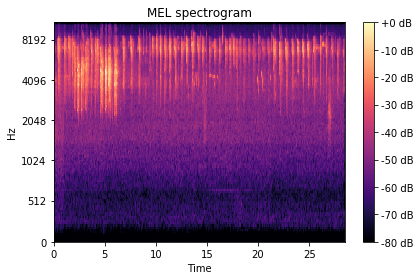

In [ ]:
S = librosa.feature.melspectrogram(audio, sr=samplerate, n_fft = 2048)
S_power_para_db = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_power_para_db, y_axis='mel', x_axis='time')
plt.title('MEL spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [ ]:
S.shape

(128, 1226)

#### Reconstruindo o sinal

/usr/local/lib/python3.6/dist-packages/librosa/display.py:696: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


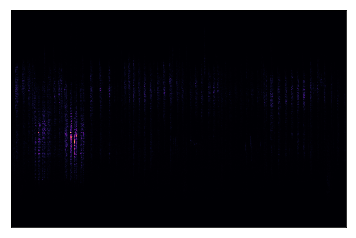

In [ ]:
D = librosa.stft(audio)
librosa.display.specshow(D)

In [ ]:
D.shape

(1025, 1226)

In [ ]:
IPython.display.Audio(audio, rate = samplerate)

In [ ]:
reD = librosa.istft(D)
IPython.display.Audio(reD, rate = samplerate)

In [ ]:
print('O audio original possui {} segundos'.format(audio.shape[0] / samplerate))
print('O audio reconstruido possui {} segundos'.format(reD.shape[0] / samplerate))

O audio original possui 28.447120181405896 segundos
O audio reconstruido possui 28.444444444444443 segundos


#### Visualizando o arquivo CSV

In [ ]:
CAMINHO_CSV = 'minidataset/train/mini_birdsong_train.csv'
dataframe = pd.read_csv(CAMINHO_CSV)

In [ ]:
dataframe

file_id  ...                                            license
0   132608  ...  http://creativecommons.org/licenses/by-nc-sa/3.0/
1   132611  ...  http://creativecommons.org/licenses/by-nc-sa/3.0/
2    82715  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/
3    64685  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/
4   120664  ...  http://creativecommons.org/licenses/by-nc-nd/3.0/
5   120666  ...  http://creativecommons.org/licenses/by-nc-nd/3.0/
6   124052  ...  http://creativecommons.org/licenses/by-nc-nd/3.0/
7   124053  ...  http://creativecommons.org/licenses/by-nc-nd/3.0/
8   113082  ...  http://creativecommons.org/licenses/by-nc-sa/3.0/
9   101371  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/

[10 rows x 10 columns]

#### Anotando o nome das espécies

In [ ]:
CAMINHO_CSV = 'minidataset/train/mini_birdsong_train.csv'
dataframe = pd.read_csv(CAMINHO_CSV)
species = []
for specie in dataframe['species']:
    species.append(specie)

# Retirando os repetidos
aux = []
for i, specie in enumerate(species):
    if i != len(species) - 1:
        if species[i + 1] != specie:
            aux.append(specie)
aux.append(specie)
species = aux

#### Calculando o spectrograma-mel para as amostras da pasta de treino

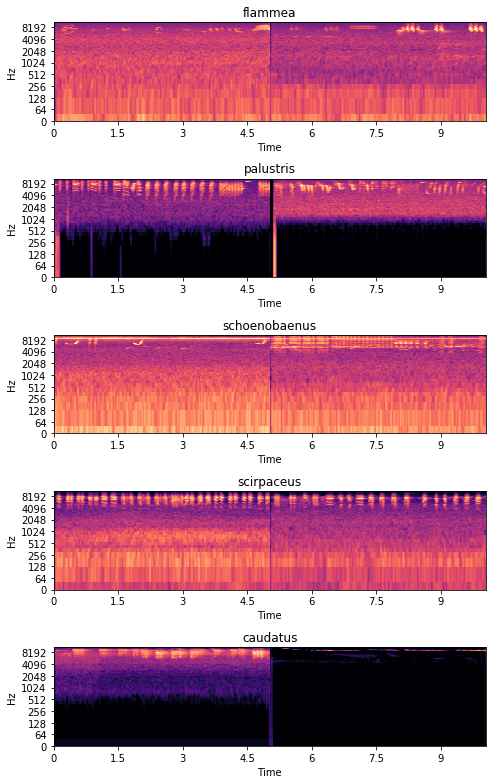

In [ ]:
CAMINHO_CSV = 'minidataset/train/mini_birdsong_train.csv'
CAMINHO_DADOS = 'minidataset/train/audios/xc'
TEMPO_INICIAL = 0
TEMPO_FINAL = 5
dataframe = pd.read_csv(CAMINHO_CSV)
fig, ax = plt.subplots(nrows = 5, figsize=(7, 11))
i = 0
j = 0
for i, s in enumerate(species):
    spectrs = np.zeros((128, 1))
    for file_id, spec in dataframe.loc[dataframe.loc[:, 'species'] == s, ['file_id', 'species']].values:
        #specie = str(dataframe.loc[d, jataframe.loc[:, 'file_id'] == file_id, ['species']].values[0,0])
        #specie = str(dataframe.loc[dataframe.loc[:, 'file_id'] == file_id, ['species']].values[0,0])

        audio, samplerate = librosa.load(CAMINHO_DADOS + str(file_id) + ".flac")
        S = librosa.feature.melspectrogram(audio[int(TEMPO_INICIAL * samplerate) : int(TEMPO_FINAL * samplerate)], sr=samplerate)
        S_power_para_db = librosa.power_to_db(S, ref=np.max)
        spectrs = np.append(spectrs, S_power_para_db, axis = 1)

    librosa.display.specshow(spectrs, x_axis = 'time', y_axis = 'log', ax = ax[i], sr = samplerate)
    ax[i].set_title(s)

plt.tight_layout()
#plt.savefig('Spectrograma-Mel(5 classes).jpg')
plt.show()

#### Coletando amostras de Treino e Teste

In [ ]:
# Coletando amostras para treino
CAMINHO_CSV = 'minidataset/train/mini_birdsong_train.csv'
CAMINHO_DADOS = 'minidataset/train/audios/xc'
dataframe = pd.read_csv(CAMINHO_CSV)
TEMPO_INICIAL = 1 #1s
TEMPO_FINAL = 5
x_train = []
y_train = []
for s in species:
    for file_id, spec in dataframe.loc[dataframe.loc[:, 'species'] == s, ['file_id', 'species']].values:
        audio, samplerate = librosa.load(CAMINHO_DADOS + str(file_id) + ".flac")
        #S = librosa.feature.melspectrogram(audio[int(TEMPO_INICIAL * samplerate) : int(TEMPO_FINAL * samplerate)], sr=samplerate)
        #S_   power_para_db = librosa.power_to_db(S, ref=np.max)
        D = librosa.stft(audio[int(TEMPO_INICIAL * samplerate) : int(TEMPO_FINAL * samplerate)], n_fft = 1024)
        x_train.append(D)
        y_train.append(s)

# Coletando amostras para teste
CAMINHO_CSV = 'minidataset/test/mini_birdsong_test.csv'
CAMINHO_DADOS = 'minidataset/test/audios/xc'
dataframe = pd.read_csv(CAMINHO_CSV)
TEMPO_INICIAL = 1 #1s
TEMPO_FINAL = 5
x_test = []
y_test = []
for s in species:
    for file_id, spec in dataframe.loc[dataframe.loc[:, 'species'] == s, ['file_id', 'species']].values:
        audio, samplerate = librosa.load(CAMINHO_DADOS + str(file_id) + ".flac")
        #S = librosa.feature.melspectrogram(audio[int(TEMPO_INICIAL * samplerate) : int(TEMPO_FINAL * samplerate)], sr=samplerate)
        #S_power_para_db = librosa.power_to_db(S, ref=np.max)
        #x_test.append(S_power_para_db)
        D = librosa.stft(audio[int(TEMPO_INICIAL * samplerate) : int(TEMPO_FINAL * samplerate)], n_fft = 1024)
        x_test.append(D)
        y_test.append(s)

In [ ]:
D = librosa.stft(audio[int(TEMPO_INICIAL * samplerate) : int(TEMPO_FINAL * samplerate)], n_fft = 1024)

In [ ]:
D.shape


(513, 345)

/usr/local/lib/python3.6/dist-packages/librosa/display.py:696: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


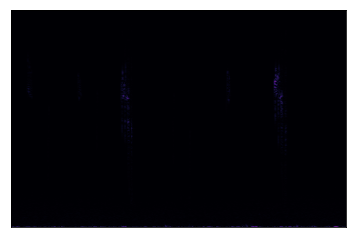

In [ ]:
librosa.display.specshow(D)

In [ ]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
len(x_train), len(x_train[0]), len(x_train[0][0])

(10, 513, 345)

In [ ]:
for x in x_train:
  print(len(x), len(x[0]))
  x = np.abs(x)

513 345
513 345
513 345
513 345
513 345
513 345
513 345
513 345
513 345
513 345


In [ ]:
y_train[0]

'flammea'

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10, 513, 345), (5, 513, 345), (10,), (5,))

In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

label_encoder = preprocessing.LabelEncoder()
y_train = np_utils.to_categorical(label_encoder.fit_transform(y_train))
y_test = np_utils.to_categorical(label_encoder.fit_transform(y_test))

Using TensorFlow backend.


In [ ]:
y_train.shape, y_test.shape

((10, 5), (5, 5))

#### CNN, alimentada com espectrogramas-mel

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, LeakyReLU
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import models

In [ ]:
model = Sequential()
model.add(Conv2D(80, [7, 7], padding = 'SAME', input_shape = (513, 345, 1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [5,5], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [1,1], padding = 'SAME'))
model.add(Conv2D(256, [3,3], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))
#
#model.add(Conv2D(512, [1,1], padding = 'SAME'))
#model.add(Conv2D(512, [3,3], padding = 'SAME',activation = 'relu'))
#model.add(Conv2D(512, [1,1], padding = 'SAME'))
#model.add(Conv2D(512, [3,3], padding = 'SAME', activation = 'relu'))
#model.add(MaxPool2D(padding = 'SAME'))
model.add(Flatten())

#model.add(Dense(1024, activation = 'relu'))
#model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)
#opt = SGD(lr =0.5, decay = 1e-6, momentum = 0.9, nesterov = True)

model.compile(loss='categorical_crossentropy', metrics = ['acc'], optimizer = opt)
print(model.summary())







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 513, 345, 80)      4000      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 513, 345, 80)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 257, 173, 80)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 257, 173, 256)     512256    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 257, 173, 256)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 129, 87, 256)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 129, 87, 256

In [ ]:
model.fit(np.expand_dims(x_train, axis = 3), y_train, epochs = 5, validation_data = (np.expand_dims(x_test, axis = 3), y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 10 samples, validate on 5 samples
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


10/10 [==============================] - 46s 5s/step - loss: 1.6028 - acc: 0.2000 - val_loss: 2.1798 - val_acc: 0.2000
Epoch 2/5
10/10 [==============================] - 30s 3s/step - loss: 0.9317 - acc: 0.6000 - val_loss: 1.6466 - val_acc: 0.4000
Epoch 3/5
10/10 [==============================] - 26s 3s/step - loss: 0.1331 - acc: 1.0000 - val_loss: 2.0025 - val_acc: 0.4000
Epoch 4/5
10/10 [==============================] - 26s 3s/step - loss: 0.0399 - acc: 1.0000 - val_loss: 2.8727 - val_acc: 0.2000
Epoch 5/5
10/10 [==============================] - 26s 3s/step - loss: 0.0126 - acc: 1.0000 - val_loss: 4.0375 - val_acc: 0.2000


#### Visualizando

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
entrada = np.expand_dims(x_train[0], axis = 0)
entrada = np.expand_dims(entrada, axis = 3)
activations = activation_model.predict(entrada)
# Primeira camada
first_layer_activation = activations[0]
#first_layer_activation = first_layer_activation.reshape(1, 20, 345)
print(first_layer_activation.shape)
print(activations[2].shape)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1, 513, 345, 80)
(1, 257, 173, 80)


In [ ]:
first_layer_activation[0, :, :, 2].shape

(513, 345)

primeira camada

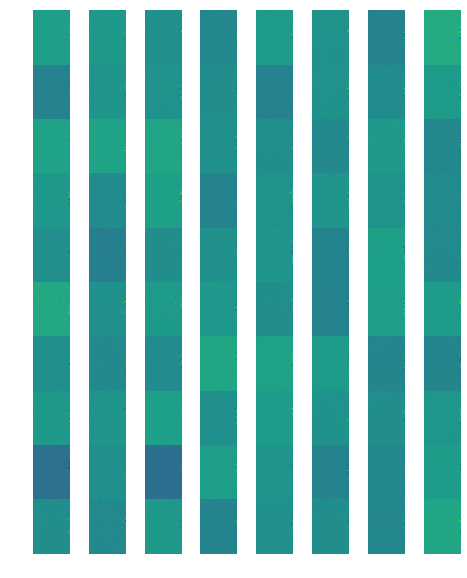

In [ ]:
plt.figure(figsize=(8, 16))
gs = gridspec.GridSpec(16, 8)
gs.update(wspace=0.0, hspace=0.0)
for i in range(80):
    ax = plt.subplot(gs[i])
    plt.axis('off')
    ax.set_aspect('equal')
    ax.imshow(first_layer_activation[0, :, :, i])
plt.savefig('primeira_camada___.jpg')
plt.show()

In [ ]:
gs

GridSpec(16, 8)

quarta camada

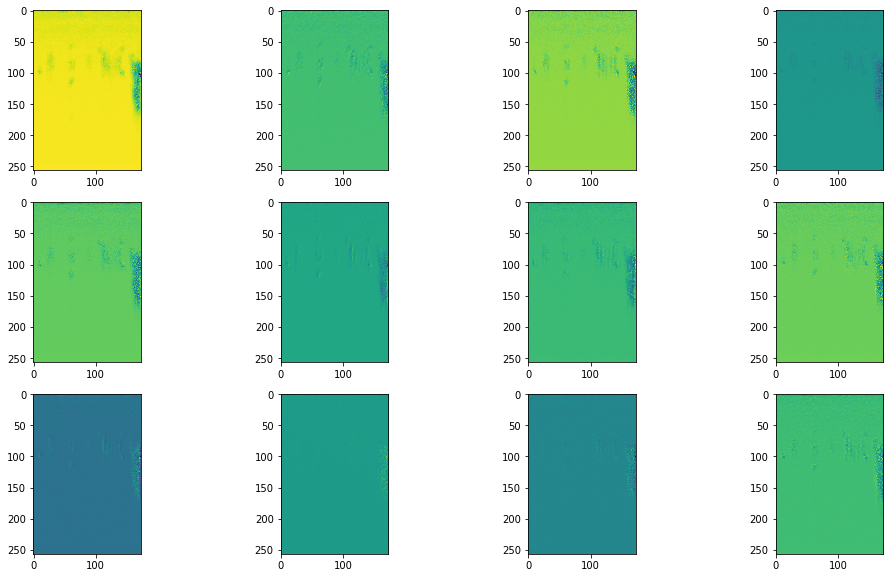

In [ ]:
ativacoes_camada = activations[3]
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(17, 10))
ax[0, 0].imshow(ativacoes_camada[0, :, :, 0])
ax[0, 1].imshow(ativacoes_camada[0, :, :, 1])
ax[0, 2].imshow(ativacoes_camada[0, :, :, 2])
ax[0, 3].imshow(ativacoes_camada[0, :, :, 3])
ax[1, 0].imshow(ativacoes_camada[0, :, :, 4])
ax[1, 1].imshow(ativacoes_camada[0, :, :, 5])
ax[1, 2].imshow(ativacoes_camada[0, :, :, 6], cmap='viridis')
ax[1, 3].imshow(ativacoes_camada[0, :, :, 7], cmap='viridis')
ax[2, 0].imshow(ativacoes_camada[0, :, :, 8], cmap='viridis')
ax[2, 1].imshow(ativacoes_camada[0, :, :, 9], cmap='viridis')
ax[2, 2].imshow(ativacoes_camada[0, :, :, 10], cmap='viridis')
ax[2, 3].imshow(ativacoes_camada[0, :, :, 11], cmap='viridis')
plt.savefig('quarta_camada___.jpg')
plt.show()

#### Ouvindo

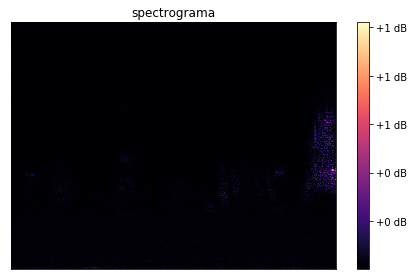

In [ ]:
librosa.display.specshow(np.abs(first_layer_activation[0, :, :, 0]))
plt.title('spectrograma')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig('1_camada_1.png')
plt.show()

In [ ]:
reD = librosa.istft(first_layer_activation[0, :, :, 0])
reD.shape
IPython.display.Audio(reD, rate = 22050)

In [ ]:
#librosa.output.write_wav('1_camada_1.wav', reD, 22050)

In [ ]:
activations[2].shape

(1, 257, 173, 80)

#### Visualizando para a terceira entrada


/usr/local/lib/python3.6/dist-packages/librosa/display.py:696: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


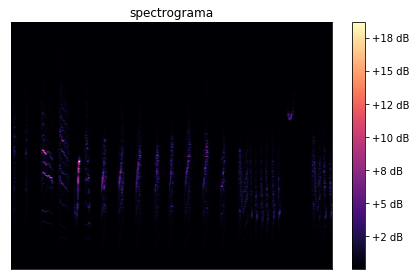

In [ ]:
#Visualizando o spectograma
librosa.display.specshow(x_train[2])
plt.title('spectrograma')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig('1_camada_1.png')
plt.show()

In [ ]:
saidas_camadas = [layer.output for layer in model.layers[:]]
activation_model = models.Model(inputs=model.input, outputs=saidas_camadas)
entrada = np.expand_dims(x_train[2], axis = 0)
entrada = np.expand_dims(entrada, axis = 3)
ativacoes = activation_model.predict(entrada)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


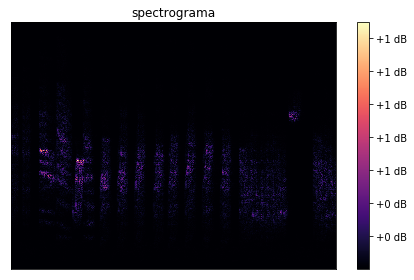

In [ ]:
primeira_camada = ativacoes[0]
librosa.display.specshow(np.abs(primeira_camada[0, :, :, 0]))
plt.title('spectrograma')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig('1_camada_1.png')
plt.show()

In [ ]:
primeira_camada[0, :, :, i].shape

(513, 345)

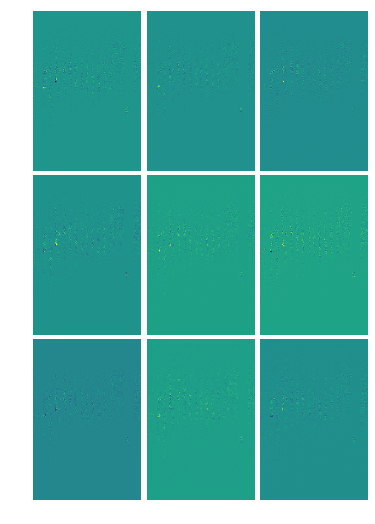

In [ ]:
plt.figure(figsize=(6.05, 9))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.025, hspace=0.025)
for i in range(9):
    ax = plt.subplot(gs[i])
    plt.axis('off')
    #ax.set_aspect('auto')
    ax.imshow(primeira_camada[0, :, :, i])
#plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
plt.savefig('2_primeira_camada_.jpg')
plt.show()

In [ ]:
for a in ativacoes:
  print(a.shape)

(1, 513, 345, 80)
(1, 513, 345, 80)
(1, 257, 173, 80)
(1, 257, 173, 256)
(1, 257, 173, 256)
(1, 129, 87, 256)
(1, 129, 87, 256)
(1, 129, 87, 256)
(1, 129, 87, 256)
(1, 65, 44, 256)
(1, 732160)
(1, 512)
(1, 5)


In [ ]:
nona_camada.shape

(1, 129, 87, 256)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-54233f9d6f5e>", line 12, in <module>
    plt.savefig('2_nona_camada_256filtros.jpg')
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py", line 689, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py", line 2094, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/backend_bases.py", line 2075, in print_figure
    **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py", line 578, in print_jpg
    return background.save(filename_or_obj, format='jpeg', **options)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 1925, in save
    fp = builtins.open(filename, "w+b")
OSError: [

OSError: ignored

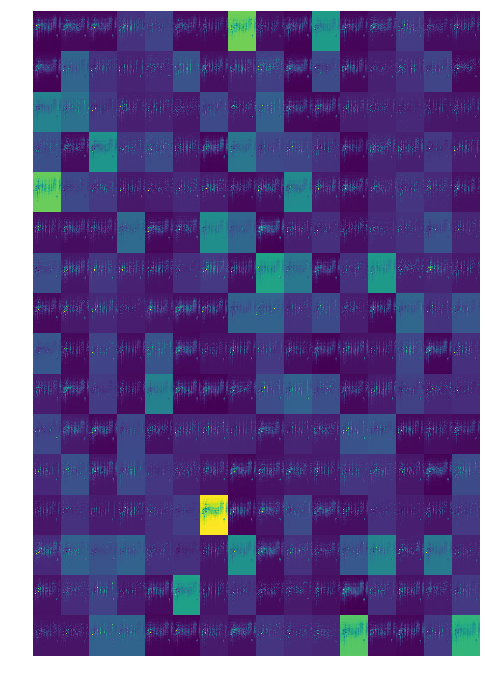

In [ ]:
nona_camada = ativacoes[8]
plt.figure(figsize = (8, 11.862068968))
gs = gridspec.GridSpec(16, 16)
gs.update(wspace=0.0, hspace=0.0)
for i in range(256):
    ax = plt.subplot(gs[i])
    plt.axis('off')
    #ax.set_aspect('auto')
    ax.imshow(nona_camada[0, :, :, i])
#plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
plt.savefig('2_nona_camada_256filtros.jpg')
plt.show()

In [ ]:
len(ativacoes)

13